__Reading in the Event and Tracking Datasets__

In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# set up initial path to data
DATADIR = 'C:/Users/User/Desktop/Datasets/This is the fourth lecture/sample-data-master/sample-data-master/data'
game_id = 2 # let's look at sample match 2

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

# read in tracking data
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [3]:
# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

In [4]:
# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home,tracking_away,events = mio.to_single_playing_direction(tracking_home,tracking_away,events)

In [5]:
print(events.shape)
print(tracking_home.shape)
print(tracking_away.shape)

(1935, 14)
(141156, 32)
(141156, 28)


In [6]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [7]:
tracking_home.head(25)

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0.24,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,0.28,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.09540,-9.58120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,0.32,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.07738,-9.95928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0.36,46.93150,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.06466,-10.12316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above we can see all the 25 frames/rows for the first second. Each second has 25 rows. And for each frame we have X and Y positions for all the players and the ball.

In [8]:
tracking_home.columns

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')

__Generating a video for the goals__

In [9]:
shots = events[events['Type']=='SHOT']
goals = shots[shots['Subtype'].str.contains('-GOAL')]
goals.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,-30.74,5.44,-54.06,2.72


In [10]:
#Let's generate a 20 second video of the second home goal that is index 1118.
#20 secons is 500 frames (20x25)

events.loc[1107:1118]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1107,Home,CHALLENGE,AERIAL-LOST,2,73553,2942.12,73553,2942.12,Player7,NaN,24.38,-14.96,NaN,NaN
1108,Home,RECOVERY,NaN,2,73594,2943.76,73594,2943.76,Player6,NaN,23.32,-3.40,NaN,NaN
1109,Home,PASS,NaN,2,73621,2944.84,73649,2945.96,Player6,Player5,20.14,0.68,4.24,-4.08
1110,Home,PASS,NaN,2,73692,2947.68,73731,2949.24,Player5,Player8,-4.24,-6.12,-11.66,-25.84
1111,Home,PASS,NaN,2,73813,2952.52,73844,2953.76,Player8,Player9,-27.56,-21.08,-36.04,-4.08
1112,Home,CHALLENGE,TACKLE-LOST,2,73854,2954.16,73854,2954.16,Player9,NaN,-37.10,-4.08,NaN,NaN
1113,Home,BALL LOST,THEFT,2,73854,2954.16,73854,2954.16,Player9,NaN,-37.10,-4.08,NaN,NaN
1114,Home,RECOVERY,INTERCEPTION,2,73877,2955.08,73877,2955.08,Player10,NaN,-39.22,-8.16,NaN,NaN
1115,Home,PASS,NaN,2,73902,2956.08,73923,2956.92,Player10,Player8,-39.22,-8.16,-43.46,-19.04
1116,Home,PASS,CROSS,2,73955,2958.20,73983,2959.32,Player8,Player9,-46.64,-19.72,-47.70,1.36


In [11]:
#if we start showing from the 1107 index let's say it will mean that our start frame will be 73,600 and avobe

In [12]:
# Making a movie of the second home team goal - (uncomment the 2 lines below to generate the video)
#PLOTDIR = DATADIR
#mviz.save_match_clip(tracking_home.iloc[73600:73600+500],tracking_away.iloc[73600:73600+500],PLOTDIR,fname='home_goal_second',include_player_velocities=False)

In [13]:
events.loc[817:823]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
817,Away,RECOVERY,INTERCEPTION,1,52694,2107.76,52694,2107.76,Player17,NaN,-1.06,6.80,NaN,NaN
818,Away,PASS,HEAD,1,52696,2107.84,52746,2109.84,Player17,Player18,-1.06,7.48,-5.30,18.36
819,Away,PASS,NaN,1,52784,2111.36,52807,2112.28,Player18,Player21,-3.18,22.44,1.06,12.24
820,Away,PASS,NaN,1,52871,2114.84,52936,2117.44,Player21,Player19,2.12,12.92,30.74,-26.52
821,Away,PASS,NaN,1,52941,2117.64,52971,2118.84,Player19,Player23,30.74,-27.20,37.10,-15.64
822,Away,PASS,NaN,1,53027,2121.08,53045,2121.80,Player23,Player24,41.34,-9.52,44.52,2.72
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36


In [14]:
# Making a movie of the first away goal - (uncomment the 2 lines below to generate the video)
#PLOTDIR = DATADIR
#mviz.save_match_clip(tracking_home.iloc[52694:52694+500],tracking_away.iloc[52694:52694+500],PLOTDIR,fname='away_goal_first',include_player_velocities=False)

__Player Velocities__

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y', 'Home_1_vx', 'Home_1_vy',
       'Home_1_speed', 'Home_10_vx', 'Home_10_vy', 'Home_10_speed',
       'Home_11_vx', 'Home_11_vy', 'Home_11_speed', 'Home_12_vx', 'Home_12_vy',
       'Home_12_speed', 'Home_13_vx', 'Home_13_vy', 'Home_13_speed',
       'Home_14_vx', 'Home_14_vy', 'Home_14_speed', 'Home_2_vx', 'Home_2_vy',
       'Home_2_speed', 'Home_3_vx', 'Home_3_vy', 'Home_3_speed', 'Home_4_vx',
       'Home_4_vy', 'Home_4_speed', 'Home_5_vx', 'Home_5_vy', 'Home_5_speed',
       'Home_6_vx', 'Home_6_vy', 'Home_6_speed', 'Home_7_vx', 'Home_7_vy',
       'Home_7_spe

C:\Users\User\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\User\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\User\Metrica_Viz.py:149: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

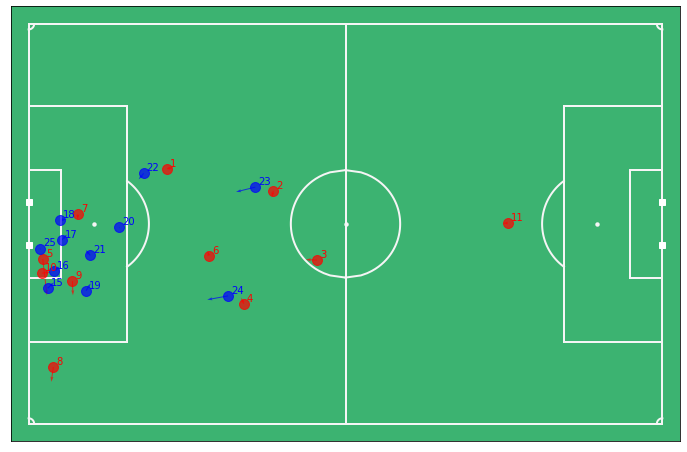

In [15]:
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

print(tracking_home.columns)

# plot a random frame, plotting the player velocities using quivers
mviz.plot_frame(tracking_home.loc[10000], tracking_away.loc[10000], include_player_velocities=True, annotate=True)

We can see the velocities plotted. The longer the arrow the faster the player was accelerating.

__Calculating The Distance Covered - Who Run The Most__

In [16]:
# Create a Physical summary dataframe for home players
home_players = np.unique( [ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home' ] )
home_summary = pd.DataFrame(index=home_players) #this is an empty dataframe with jersey numbers as the index

# Calculate minutes played for each player (it's gonna be the first column on the printed dataframe below)
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    player_minutes = ( tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60. # convert to minutes
    minutes.append( player_minutes )
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending=False)

# Calculate total distance covered for each player (it's gonna be the second column in the dataframe below)
distance = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    player_distance = tracking_home[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

home_summary.head(30)

,Minutes Played,Distance [km]
1,94.104000,10.418124
11,94.104000,5.237010
2,94.104000,9.896841
3,94.104000,9.591745
5,94.104000,11.979224
6,94.104000,11.573299
7,94.104000,11.108719
9,94.104000,9.803775
10,83.825333,9.019024
8,70.740667,9.046879


Text(0, 0.5, 'Distance covered [km]')

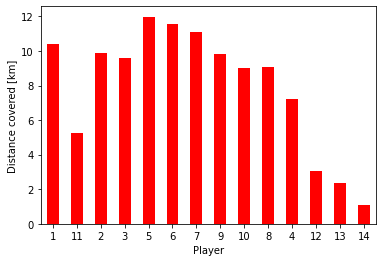

In [17]:
# make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0, color = 'red')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

C:\Users\User\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\User\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\User\Metrica_Viz.py:149: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

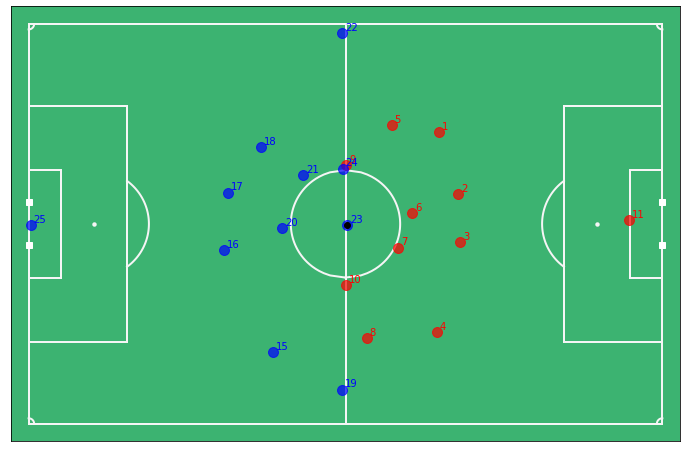

In [18]:
# plot positions at KO (to find out what position each player from the graph is playing)
mviz.plot_frame( tracking_home.loc[51], tracking_away.loc[51], include_player_velocities=False, annotate=True)

We cans see that the 11th player happens to be the goalkeeper which explains why he ran the least. The ones with the highest distances covered are the players 5,6 and 7, which is not surprising as they are the midfielders as we can see from the pitch plotted above.

__Classifing How Those Distances have been covered by each player__

In [19]:
# now calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # walking (less than 2 m/s)
    player_distance = tracking_home.loc[tracking_home[column] < 2, column].sum()/25./1000
    walking.append( player_distance )
    # jogging (between 2 and 4 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 2) & (tracking_home[column] < 4), column].sum()/25./1000
    jogging.append( player_distance )
    # running (between 4 and 7 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 4) & (tracking_home[column] < 7), column].sum()/25./1000
    running.append( player_distance )
    # sprinting (greater than 7 m/s)
    player_distance = tracking_home.loc[ tracking_home[column] >= 7, column].sum()/25./1000
    sprinting.append( player_distance )
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting

home_summary.head(25)

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km]
1,94.104000,10.418124,3.708538,4.434862,2.177109,0.097614
11,94.104000,5.237010,4.413459,0.786952,0.031087,0.005512
2,94.104000,9.896841,4.083395,4.077484,1.632026,0.103936
3,94.104000,9.591745,4.179823,3.851974,1.394199,0.165750
5,94.104000,11.979224,3.588130,4.666655,3.532567,0.191871
6,94.104000,11.573299,3.388722,5.150761,2.846101,0.187716
7,94.104000,11.108719,3.613849,4.960861,2.342095,0.191915
9,94.104000,9.803775,4.439447,3.328606,1.869363,0.166359
10,83.825333,9.019024,3.862551,3.433265,1.423594,0.299614
8,70.740667,9.046879,2.605117,4.137275,2.201993,0.102494


Text(0, 0.5, 'Distance covered [m]')

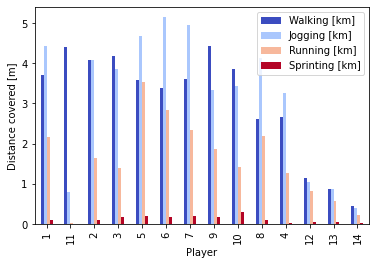

In [20]:
# make a clustered bar chart of distance covered for each player at each speed
ax = home_summary[['Walking [km]','Jogging [km]','Running [km]','Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

We can see that most of the players gained the distance covered kilometers on their count mostly by walking.

Sprinting happens rarely and has a small share in terms of kilometers. And we can see that some players have done more - that are the attacking ones, and some players haven't done any such us 11th, 2rd and 3rd players.

__Finding how many sprints each player had made and adding it as a new column__

In [21]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 7 # minimum speed to be defined as a sprint (m/s)
sprint_window = 1*25 # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
    nsprints.append( np.sum( player_sprints == 1 ) )
home_summary['# sprints'] = nsprints
home_summary.head(25)

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],# sprints
1,94.104000,10.418124,3.708538,4.434862,2.177109,0.097614,5
11,94.104000,5.237010,4.413459,0.786952,0.031087,0.005512,0
2,94.104000,9.896841,4.083395,4.077484,1.632026,0.103936,3
3,94.104000,9.591745,4.179823,3.851974,1.394199,0.165750,7
5,94.104000,11.979224,3.588130,4.666655,3.532567,0.191871,7
6,94.104000,11.573299,3.388722,5.150761,2.846101,0.187716,8
7,94.104000,11.108719,3.613849,4.960861,2.342095,0.191915,8
9,94.104000,9.803775,4.439447,3.328606,1.869363,0.166359,7
10,83.825333,9.019024,3.862551,3.433265,1.423594,0.299614,13
8,70.740667,9.046879,2.605117,4.137275,2.201993,0.102494,6


We can see that the player 10 made the most of the sprints and we can see from the pitch plotted above that he is one of the strikers, which explains everything. Now let's see where he mad those sprints.

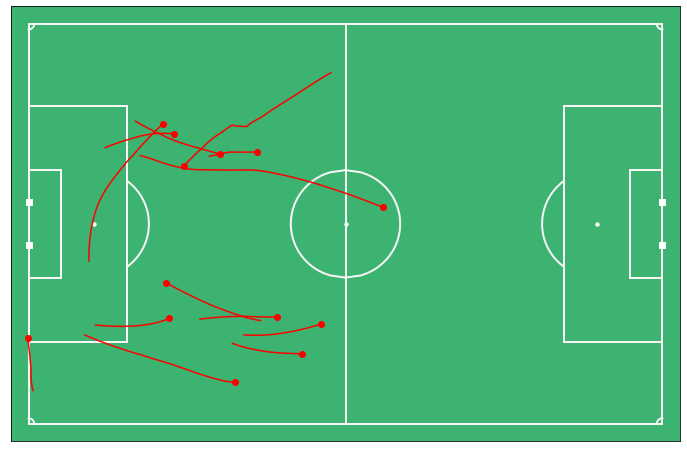

In [22]:
# Plot the trajectories for each of player 10's sprints
player = '10'
column = 'Home_' + player + '_speed' # spped
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
player_sprints_start = np.where( player_sprints == 1 )[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where( player_sprints == -1 )[0] + int(sprint_window/2) + 1
# now plot all the sprints (we have the frames now)

fig,ax = mviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(tracking_home[column_x].iloc[s],tracking_home[column_y].iloc[s],'ro')
    ax.plot(tracking_home[column_x].iloc[s:e+1],tracking_home[column_y].iloc[s:e+1],'r')